In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
import time

In [1]:
def get_next_position(pos,rows,columns):
    move = random.choice(['left','right','up','down'])
    if move=='left':
        return [pos[0],(pos[1]-1)%columns]
    elif move=='right':
        return [pos[0],(pos[1]+1)%columns]
    elif move=='up':
        return [(pos[0]-1)%rows, pos[1]]
    elif move=='down':
        return [(pos[0]+1)%rows, pos[1]]

class grid_2D:
    def __init__( self, x , y):
        self.x = x
        self.y = y
        self.grid = np.zeros((x,y),dtype=int)
    def add_molecule_traps(self, c):
        N = int((self.x*self.y)*c)
        molecules = 0
        while molecules<N:
            x = random.randint(0,self.x-1)
            y = random.randint(0,self.y-1)
            if self.grid[x,y]==0:
                self.grid[x,y]=1
                molecules+=1
    def add_particle(self):
        while True:
            x = random.randint(0,self.x-1)
            y = random.randint(0,self.y-1)
            if self.grid[x,y]==0:
                self.particle_position = [x,y]
                break
    def random_walk(self):
        position = self.particle_position
        steps=0
        while True:
            next_position = get_next_position(position,self.x,self.y)
            if self.grid[next_position[0],next_position[1]]==1:
                steps+=1
                break
            else:
                position = next_position
                steps+=1
        return steps
    def show(self):
        display(self.grid)

In [3]:
########create 500x500 grid######
c = 0.01
grid1 = grid_2D(500,500)
grid1.add_molecule_traps(c)

In [10]:
start_time = time.time()

trap_times1 = []
for i in range(100000):
    grid1.add_particle()
    trap_times1.append(grid1.random_walk())

data1 = trap_times1.copy()
print(f"Execution time: {(time.time() - start_time)} seconds")

Execution time: 25.733628273010254 seconds


In [13]:
##########save data##############
data1_in = np.array(trap_times1,dtype=int)
np.savetxt('data1.csv',(data1_in),delimiter = ',',fmt = '% 4d')

In [64]:
data1 = list(np.loadtxt('data1.csv',delimiter = ',',dtype=int))

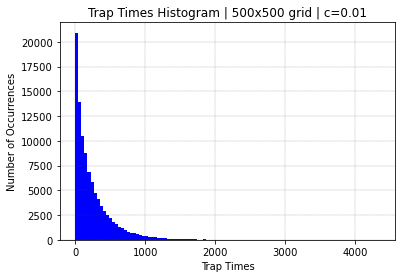

In [63]:
plt.hist(data1, bins = 100, color = 'blue')
plt.grid(color='0.25', linestyle='--', linewidth=0.2)
plt.ylabel('Number of Occurrences')
plt.xlabel('Trap Times')
plt.title('Trap Times Histogram | 500x500 grid | c=0.01')
plt.savefig('../pdf/figures/TRW_001_hist.png')
plt.show()

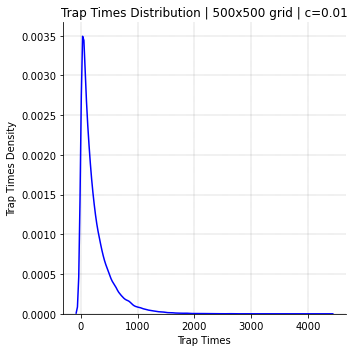

In [53]:
sns.displot(data1, kind="kde", color = "blue")
plt.grid(color='0.25', linestyle='--', linewidth=0.2)
plt.ylabel('Trap Times Density')
plt.xlabel('Trap Times')
plt.title('Trap Times Distribution | 500x500 grid | c=0.01')
plt.tight_layout()
plt.savefig('../pdf/figures/TRW_001_dens.png')
plt.show()

In [52]:
c = 0.001
grid2 = grid_2D(500,500)
grid2.add_molecule_traps(c)

In [53]:
start_time = time.time()

trap_times2 = [] 
for i in range(100000):
    grid2.add_particle()
    trap_times2.append(grid2.random_walk())

data2 = trap_times2.copy()
print(f"Execution time: {(time.time() - start_time)} seconds")

Execution time: 337.0471861362457 seconds


In [54]:
##########save data##############
data2_in = np.array(trap_times2,dtype=int)
np.savetxt('data2.csv',(data2_in),delimiter = ',',fmt = '% 4d')

In [65]:
data2 = list(np.loadtxt('data2.csv',delimiter = ',',dtype=int))

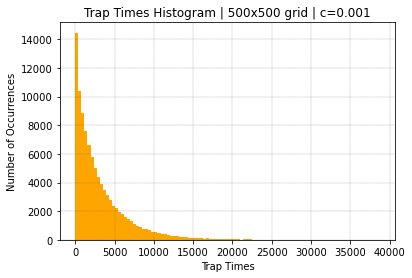

In [92]:
plt.hist(data2, bins = 100, color = 'orange')
plt.grid(color='0.25', linestyle='--', linewidth=0.2)
plt.ylabel('Number of Occurrences')
plt.xlabel('Trap Times')
plt.title('Trap Times Histogram | 500x500 grid | c=0.001')
plt.savefig('../pdf/figures/TRW_0001_hist.png')
plt.show()

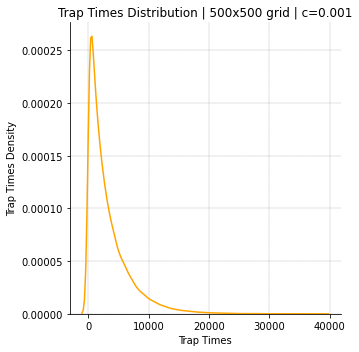

In [54]:
sns.displot(data2, kind="kde", color = "orange")
plt.grid(color='0.25', linestyle='--', linewidth=0.2)
plt.locator_params(axis='x', nbins=5)
plt.ylabel('Trap Times Density')
plt.xlabel('Trap Times')
plt.title('Trap Times Distribution | 500x500 grid | c=0.001')
plt.tight_layout()
plt.savefig('../pdf/figures/TRW_0001_dens.png')
plt.show()

C:\Users\jmstf\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


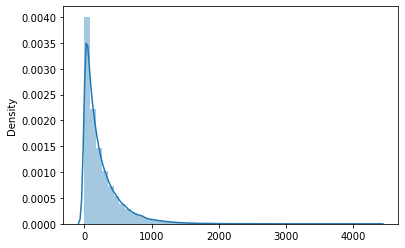

In [69]:
(line1_x, line1_y) = sns.distplot(data1).get_lines()[0].get_data()

C:\Users\jmstf\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


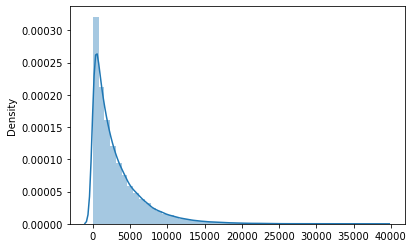

In [70]:
(line2_x, line2_y) = sns.distplot(data2).get_lines()[0].get_data()

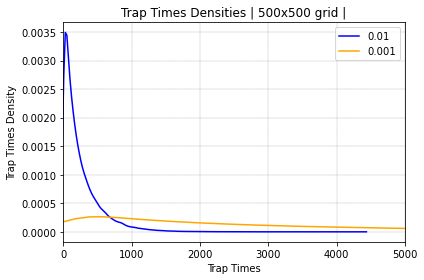

In [94]:
plt.plot(line1_x, line1_y, color='blue', label = '0.01')
plt.plot(line2_x, line2_y, color='orange', label = '0.001')
plt.xlim(0,5000)
plt.grid(color='0.25', linestyle='--', linewidth=0.2)
plt.ylabel('Trap Times Density')
plt.xlabel('Trap Times')
plt.title('Trap Times Densities | 500x500 grid |')
plt.legend()
plt.tight_layout()
plt.savefig('../pdf/figures/TRW_both_dist.png')
plt.show()

In [16]:
timetrap_data = pd.DataFrame({"c=0.01":data1,"c=0.001":data2})

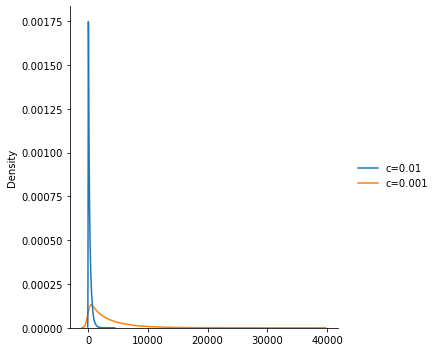

In [24]:
sns.displot(data=timetrap_data, kind = 'kde' )

<ipython-input-104-c3790f6e321e>:2: RuntimeWarning: divide by zero encountered in double_scalars
  s_n = [(1-0.01)**((np.pi*n)/np.log(n)) for n in n]


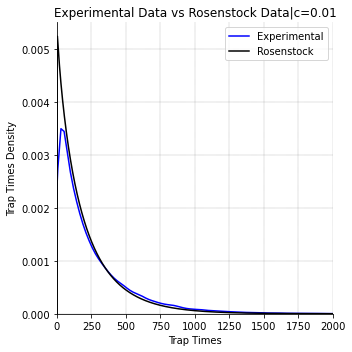

In [104]:
n = np.arange(1,5000,1)
s_n = [(1-0.01)**((np.pi*n)/np.log(n)) for n in n]
norm_const1 = np.sum(s_n)
s_n = [x/norm_const1 for x in s_n]

sns.displot(data1, kind="kde", color = "blue", label = 'Experimental')
plt.plot(n,s_n,color='black',label = 'Rosenstock')
plt.xlim(0,2000)
plt.grid(color='0.25', linestyle='--', linewidth=0.2)
plt.ylabel('Trap Times Density')
plt.xlabel('Trap Times')
plt.title('Experimental Data vs Rosenstock Data|c=0.01')
plt.legend()
plt.tight_layout()
plt.savefig('../pdf/figures/Rosenstock_001.png')
plt.show()

<ipython-input-106-db47f63d06c3>:2: RuntimeWarning: divide by zero encountered in double_scalars
  s_n = [(1-0.001)**((np.pi*n)/np.log(n)) for n in n]


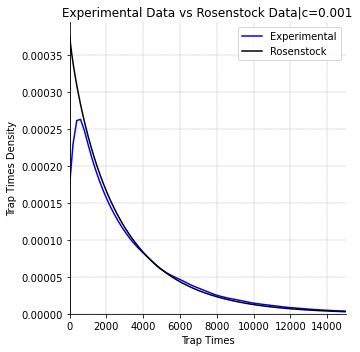

In [106]:
n = np.arange(1,30000,1)
s_n = [(1-0.001)**((np.pi*n)/np.log(n)) for n in n]
norm_const1 = np.sum(s_n)
s_n = [x/norm_const1 for x in s_n]

sns.displot(data2, kind="kde", color = "blue", label = 'Experimental')
plt.plot(n,s_n,color='black',label = 'Rosenstock')
plt.xlim(0,15000)
plt.grid(color='0.25', linestyle='--', linewidth=0.2)
plt.ylabel('Trap Times Density')
plt.xlabel('Trap Times')
plt.title('Experimental Data vs Rosenstock Data|c=0.001')
plt.legend()
plt.tight_layout()
plt.savefig('../pdf/figures/Rosenstock_0001.png')
plt.show()